In [16]:
import torch
%matplotlib inline
from matplotlib import pyplot as plt

In [17]:
torch.manual_seed(100)
dtype = torch.float
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim = 1)
y = 3 * x.pow(2) + 2 + 0.2 * torch.randn(x.size())

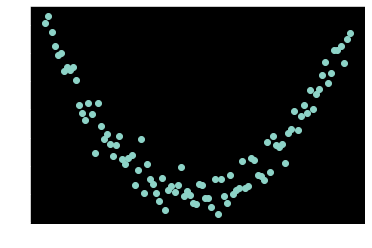

In [18]:
plt.scatter(x.numpy(), y.numpy())
plt.show()

In [19]:
w = torch.randn(1, 1, dtype = dtype, requires_grad = True)
b = torch.randn(1, 1, dtype = dtype, requires_grad = True)
lr = 0.001

In [22]:
for i in range(1000):
    y_pred = w * x.pow(2) + b
    loss = (0.5 * (y_pred - y) ** 2).sum()
    loss.backward()
    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad
        w.grad.zero_()
        b.grad.zero_()

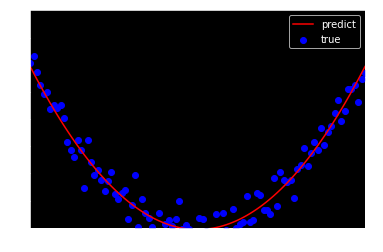

tensor([[2.9991]], requires_grad=True) tensor([[1.9685]], requires_grad=True)


In [23]:
plt.plot(x.numpy(), y_pred.detach().numpy(), color = 'red', label = 'predict')
plt.scatter(x.numpy(), y.numpy(), color = 'blue', marker = 'o', label = 'true')
plt.xlim(-1, 1)
plt.ylim(2, 6)
plt.legend()
plt.show()
print(w, b)